In [2]:
# Modules

# Load module to create Panda DataFrames in Jupyter Notebooks
import pandas as pd
# Load module to create and format various plots
import matplotlib.pyplot as plt
# Load module to handle high-level math functions and basic algebra
import numpy as np
# Load module to allow communication with HTTPS for API requests
import requests
# Load module that deserializes java script open notation into Jupyter Notebooks
import json
# Load module that returns the number of seconds passed since epoch 
import time
# Load module that contains probability distributions and statistical functions
from scipy.stats import linregress

In [3]:
# Fertility CSV:

# Define variable name that holds csv file location of the fertility rates
fertility_csv = "csv_files/Age-specific fertility rates, Total fertility and .csv"
# Define variable name the holds the read information from the csv file
fertility_csv_dataframe = pd.read_csv(fertility_csv)
# Print to screen in Pandas DataFrame the read csv information
fertility_csv_dataframe.head()

,"United Nations, Department of Economic and Social Affairs",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,"Population Division, Fertility and Family Plan...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,World Fertility Data 2012\nAGE-SPECIFIC FERTIL...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country,ISO code,Period,Reference,NaN,Total fertility,Age-specific fertility rates,NaN,NaN,NaN,...,NaN,NaN,Mean age at childbearing,Source type,Source,Survey name,Note on country or population,Note on age,Note on methods,Note on population data used in denominator
3,NaN,NaN,NaN,Year,Period,NaN,15-19,20-24,25-29,30-34,...,40-44,45-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,4,Around 1970,1973,1972-1973,8.21,168,359,355,307,...,137,81,30,Survey,National statistics,Afghanistan 1972-1974 National Demographic and...,NaN,NaN,NaN,NaN


In [4]:
# Clean:

# Define variable name that holds drop column information
fertility_clean = fertility_csv_dataframe.drop([0, 1])
# Use pandas column rename function (.columns) to rename the columns in the dataframe
fertility_clean.columns= ['Country', 'ISO Code', 'Period', 'Reference Year', 'Period', 'Total Fertility',
                          'Age-specific fertility rates: 15-19','Age-specific fertility rates: 20-24',
                          'Age-specific fertility rates: 25-29', 'Age-specific fertility rates: 30-34',
                         'Age-specific fertility rates: 35-39','Age-specific fertility rates: 40-44',
                          'Age-specific fertility rates: 45-49', 'Mean Age at Childbearing', 'D1', 'D2', 'D3','D4','D5','D6','D7']
# Drop additional columns from the already cleaned variable
fertility_clean = fertility_clean.drop(columns=['Period','D1','D2','D3','D4','D5','D6','D7'])
fertility_clean = fertility_clean.drop([2, 3])

#reference_years =sorted(fertility_clean['Reference Year'].unique())
#reference_years=fertility_clean["Reference Year"].unique()
#reference_years

# Print to screen the cleaned data variable 'fertility_clean'
fertility_clean

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing
4,Afghanistan,4,1973,8.21,168,359,355,307,235,137,81,30
5,Afghanistan,4,1979,7.11,105,260,309,301,262,185,..,30.7
6,Afghanistan,4,2003,7.52,146,333,350,289,217,143,..,30.1
7,Afghanistan,4,2009,5.11,80,257,262,209,128,60,26,29.1
8,Albania,8,1970,5.16,39,275,266,214,146,69,22,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...
1072,Zimbabwe,716,1969,6.74,79,272,304,257,218,145,73,31.2
1073,Zimbabwe,716,1987,5.42,102,251,250,212,158,80,32,29.5
1074,Zimbabwe,716,1998,3.98,112,199,180,135,108,46,15,28.3
1075,Zimbabwe,716,2004,3.8,99,205,172,144,86,42,13,28.1


In [5]:
# Sort:

# Define variable the holds the sort function of 'Reference Year' from most rescent
last_year=fertility_clean.sort_values('Reference Year', ascending=False).drop_duplicates(['ISO Code'])

reference_years =last_year['Reference Year'].unique()
fertility_clean = fertility_clean.loc[fertility_clean['Total Fertility'] != '..']
fertility_clean = fertility_clean.loc[fertility_clean['Mean Age at Childbearing'] != '..']
fertility_clean['Total Fertility']=fertility_clean['Total Fertility'].astype(float)
fertility_clean['Mean Age at Childbearing']=fertility_clean['Mean Age at Childbearing'].astype(float)
#reference_years=fertility_clean["Reference Year"].unique()
fertility_clean

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing
4,Afghanistan,4,1973,8.21,168,359,355,307,235,137,81,30.0
5,Afghanistan,4,1979,7.11,105,260,309,301,262,185,..,30.7
6,Afghanistan,4,2003,7.52,146,333,350,289,217,143,..,30.1
7,Afghanistan,4,2009,5.11,80,257,262,209,128,60,26,29.1
8,Albania,8,1970,5.16,39,275,266,214,146,69,22,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...
1072,Zimbabwe,716,1969,6.74,79,272,304,257,218,145,73,31.2
1073,Zimbabwe,716,1987,5.42,102,251,250,212,158,80,32,29.5
1074,Zimbabwe,716,1998,3.98,112,199,180,135,108,46,15,28.3
1075,Zimbabwe,716,2004,3.80,99,205,172,144,86,42,13,28.1


In [6]:
# Literacy CSV:

# Define variable name that holds the csv file location of the literacy rates
file_literacy = "csv_files/literacy-rate-adults.csv"
# Define variable name that holds the read information from the csv
literacy_df = pd.read_csv(file_literacy)
# Print to screen, in Pandas DataFrame, the read csv information
literacy_df.head(10)

,Entity,Code,Year,"Literacy rate, adult total (% of people ages 15 and above)"
0,Afghanistan,AFG,1979,18.157681
1,Afghanistan,AFG,2011,31.741119
2,Albania,ALB,2001,98.712982
3,Albania,ALB,2008,95.938637
4,Albania,ALB,2011,96.845299
5,Albania,ALB,2012,97.246971
6,Algeria,DZA,1987,49.630878
7,Algeria,DZA,2002,69.873497
8,Algeria,DZA,2006,72.648682
9,Algeria,DZA,2008,75.136047


In [7]:
# Change Name:

# change field name in literacy rate to literacy_rate
literacy_df.columns = ["Country", "Code", "Reference Year", "Literacy Rate"]
literacy_df['Reference Year']=literacy_df['Reference Year'].astype(str)
literacy_df

,Country,Code,Reference Year,Literacy Rate
0,Afghanistan,AFG,1979,18.157681
1,Afghanistan,AFG,2011,31.741119
2,Albania,ALB,2001,98.712982
3,Albania,ALB,2008,95.938637
4,Albania,ALB,2011,96.845299
...,...,...,...,...
2221,Zambia,ZMB,2010,83.007668
2222,Zimbabwe,ZWE,1982,77.794167
2223,Zimbabwe,ZWE,1992,83.512581
2224,Zimbabwe,ZWE,2011,83.582710


## Do Literacy rates effect fertility rates by age?

In [8]:
# Merge:

# merge on Country and Entity
# create df that has Country, Total Fertility, literacy_rate
correlation_df = fertility_clean.merge(literacy_df, on=['Country','Reference Year'], how='inner')
correlation_df['Total Fertility']=correlation_df['Total Fertility'].astype(float)
correlation_df

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing,Code,Literacy Rate
0,Afghanistan,4,1979,7.11,105,260,309,301,262,185,..,30.7,AFG,18.157681
1,Algeria,12,2008,2.74,9,75,139,149,118,51,8,31.8,DZA,75.136047
2,Angola,24,2001,5.79,122,270,262,217,190,62,35,29.3,AGO,67.405418
3,Antigua and Barbuda,28,2001,2.01,67,94,88,79,56,19,1,27.8,ATG,98.949997
4,Aruba,533,2010,1.61,40,92,86,68,29,8,0,27.2,ABW,96.822639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Uruguay,858,1985,2.49,56,130,137,100,56,18,2,27.8,URY,95.379982
91,Uruguay,858,1996,2.55,76,128,134,100,55,16,1,27.3,URY,96.781807
92,Uruguay,858,2007,1.96,59,92,92,86,48,12,1,27.7,URY,97.863892
93,Uzbekistan,860,2000,2.58,21,205,161,90,31,7,1,26.8,UZB,98.642578


In [35]:
correlation_df['Age-specific fertility rates: 45-49'] = correlation_df['Age-specific fertility rates: 45-49'].fillna(0)
correlation_df

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing,Code,Literacy Rate
0,Afghanistan,4,1979,7.11,105,260,309,301,262,185,..,30.7,AFG,18.157681
1,Algeria,12,2008,2.74,9,75,139,149,118,51,8,31.8,DZA,75.136047
2,Angola,24,2001,5.79,122,270,262,217,190,62,35,29.3,AGO,67.405418
3,Antigua and Barbuda,28,2001,2.01,67,94,88,79,56,19,1,27.8,ATG,98.949997
4,Aruba,533,2010,1.61,40,92,86,68,29,8,0,27.2,ABW,96.822639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Uruguay,858,1985,2.49,56,130,137,100,56,18,2,27.8,URY,95.379982
91,Uruguay,858,1996,2.55,76,128,134,100,55,16,1,27.3,URY,96.781807
92,Uruguay,858,2007,1.96,59,92,92,86,48,12,1,27.7,URY,97.863892
93,Uzbekistan,860,2000,2.58,21,205,161,90,31,7,1,26.8,UZB,98.642578


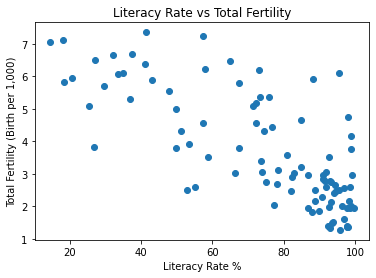

In [9]:
# Scatter Plot:

# Use Matplotlib to create scatter plot and format
plt.scatter(correlation_df["Literacy Rate"],
           correlation_df["Total Fertility"], marker="o")
# Create a unique plot title
plt.title('Literacy Rate vs Total Fertility')
# Create a lable for the y axis
plt.ylabel("Total Fertility (Birth per 1,000)")
# Create a lable for the x axis
plt.xlabel("Literacy Rate %")
# Save a png image of the scatter plot to local folder
plt.savefig('literacy_rates_vs_total_fertility')
# Print scatter plot to screen
plt.show()

#### Scatter Plot Observation:
This is a scatter plot that shows the correlation between the total fertility of births per thousand and the overall literacy rate.  It looks like there is some correlation between the two as the fertility datapoints decrease as the literacty rate increases.  We might be able to get more data points to confirm this.

In [10]:
# Linear Regression Passthrough:

# Use Python define function (def) to start a linear regression function 
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue}")
    print(f"Intercept: {intercept}")
    literacy_rate_opt = (2.1-intercept)/slope
    print(f"Literacy Rate: {literacy_rate_opt}")
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=20,color="black")
    #plt.hlines(y=2.1,color="gray",xmin=15, xmax=105)
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.show()

The r-squared is: -0.7489005930271825
Intercept: 7.657954805495637
Literacy Rate: 104.44400404158473


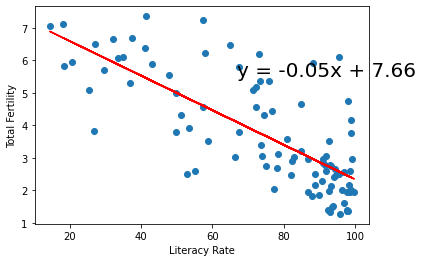

In [11]:
xlbl = "Literacy Rate"
ylbl = "Total Fertility"
lblpos = (67,5.5)
plotLinearRegression(correlation_df[xlbl],correlation_df[ylbl],xlbl,ylbl,lblpos)

#### Linear Regression Observation:
This linear regression line shows that there is a strong correlation between the fertility rate and literacy rates.  It might be helpful to compare other factors to the fertility rate such as age, country and income to see how they compare.

### What are the countries with high literacy and high fertility

In [11]:
outliers_df=correlation_df.loc[correlation_df["Literacy Rate"]>80]
outliers_df=outliers_df.loc[outliers_df["Total Fertility"]>4]

# create df that are greater than 2.1 fertilty rates in one group and less than or equal to 2.1 fertality rates
below_replacement=fertility_clean.loc[fertility_clean["Total Fertility"]<2.1]
above_replacement=fertility_clean.loc[fertility_clean["Total Fertility"]>2.1]
above_replacement
last_below_rep=below_replacement.sort_values('Reference Year', ascending=False).drop_duplicates(['Country'])
last_ab_rep=above_replacement.sort_values('Reference Year', ascending=False).drop_duplicates(['Country'])
last_ab_rep

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing
859,Seychelles,690,2011,2.54,78,124,123,110,55,19,..,27.5
321,Ethiopia,231,2010,4.80,79,207,237,192,150,68,28,29.8
516,Kyrgyzstan,417,2010,3.13,34,176,183,136,71,22,3,28.4
84,Bangladesh,50,2010,2.32,118,153,107,56,21,6,3,24.7
739,Panama,591,2010,2.40,86,133,117,85,45,12,1,26.6
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Belgium,56,1970,2.24,31,149,143,78,36,10,1,27.2
865,Singapore,702,1970,3.10,26,139,210,138,75,27,5,29.1
123,Bosnia and Herzegovina,70,1970,2.65,44,174,142,93,54,21,2,27.6
820,Saint Pierre and Miquelon,666,1969,3.79,95,200,172,127,98,67,0,28.4


The r-squared is: -0.10768225593081858
Intercept: 29.82874060554283
Literacy Rate: 47.00020620049583


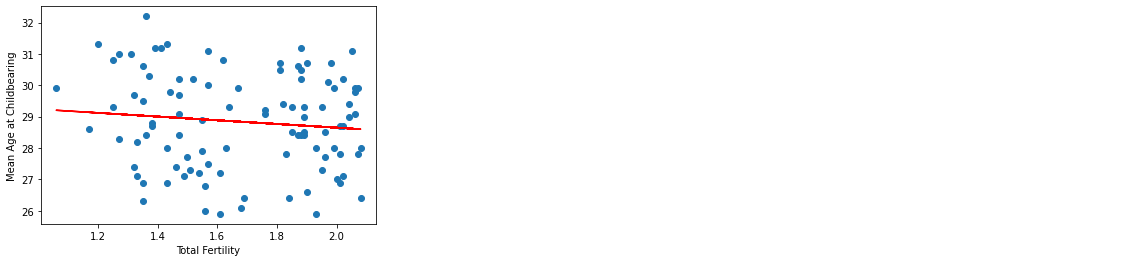

In [12]:
xlbl = "Total Fertility"
ylbl = "Mean Age at Childbearing"
lblpos = (4,26)
plotLinearRegression(last_below_rep[xlbl],last_below_rep[ylbl],xlbl,ylbl,lblpos)

The r-squared is: 0.450553948294075
Intercept: 26.508300932200964
Literacy Rate: -43.457920654357316


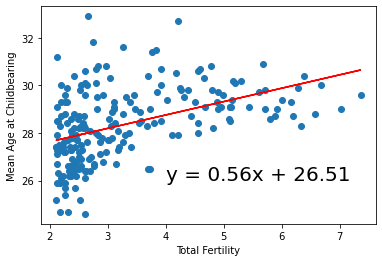

In [13]:
xlbl = "Total Fertility"
ylbl = "Mean Age at Childbearing"
lblpos = (4,26)
plotLinearRegression(last_ab_rep[xlbl],last_ab_rep[ylbl],xlbl,ylbl,lblpos)

{'whiskers': [<matplotlib.lines.Line2D at 0x192c1002190>,
 'caps': [<matplotlib.lines.Line2D at 0x192c1002880>,
 'boxes': [<matplotlib.lines.Line2D at 0x192c0720df0>],
 'medians': [<matplotlib.lines.Line2D at 0x192c1002f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x192c100d2e0>],
 'means': []}

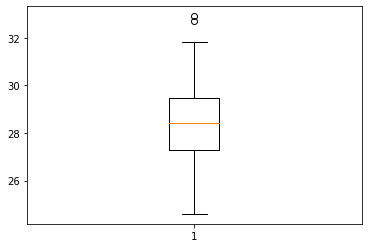

In [14]:
plt.boxplot(last_ab_rep['Mean Age at Childbearing'])

## What is the ranking of factors that affect fertility

{'whiskers': [<matplotlib.lines.Line2D at 0x192c1052b50>,
 'caps': [<matplotlib.lines.Line2D at 0x192c105f250>,
 'boxes': [<matplotlib.lines.Line2D at 0x192c1052850>],
 'medians': [<matplotlib.lines.Line2D at 0x192c105f910>],
 'fliers': [<matplotlib.lines.Line2D at 0x192c105fc70>],
 'means': []}

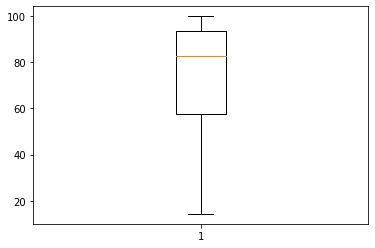

In [15]:
plt.boxplot(correlation_df['Literacy Rate'])

{'whiskers': [<matplotlib.lines.Line2D at 0x192c10aba90>,
 'caps': [<matplotlib.lines.Line2D at 0x192c10bb190>,
 'boxes': [<matplotlib.lines.Line2D at 0x192c10ab730>],
 'medians': [<matplotlib.lines.Line2D at 0x192c10bb850>],
 'fliers': [<matplotlib.lines.Line2D at 0x192c10bbbb0>],
 'means': []}

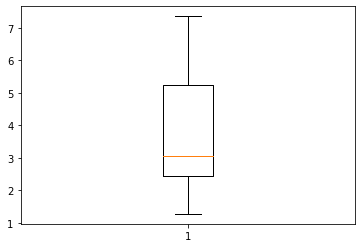

In [16]:
plt.boxplot(correlation_df['Total Fertility'])

## Where are fertility rates increasing and decreasing in comparison to literacy rates? 

## How has the age of childbearing changed over time?

In [17]:
outliers_df

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing,Code,Literacy Rate
25,Equatorial Guinea,226,2000,5.92,196,256,252,208,187,54,31,28.4,GNQ,88.308296
65,Saint Vincent and the Grenadines,670,1970,6.11,181,345,286,217,136,52,6,27.3,VCT,95.632156
66,Samoa,882,1991,4.76,25,159,241,216,175,98,38,31.7,WSM,97.944328
69,Sao Tome and Principe,678,2001,4.66,91,216,202,185,154,64,20,29.5,STP,84.908508
84,Tonga,776,1996,4.16,17,160,239,209,139,59,8,30.5,TON,98.905373


In [18]:
# API Request

# Build Empty list to store retrieved data
#fifteen_to_nineteen = []
#twenty_to_twenty_four = []
#twenty_five_to_twenty_nine = []
#thirty_to_thirty_four = []
#thirty_five_to_thirty_nine = []
#forty_to_forty_four =[]
#forty_five_to_forty_nine = []

# What data to retrieve
#fifteen_to_nineteen.append(outliers_df['Age-specific fertility rates: 15-19'])
#twenty_to_twenty_four.append(outliers_df['Age-specific fertility rates: 20-24'])
#twenty_five_to_twenty_nine.append(outliers_df['Age-specific fertility rates: 25-29'])
#thirty_to_thirty_four.append(outliers_df['Age-specific fertility rates: 30-34'])
#thirty_five_to_thirty_nine.append(outliers_df['Age-specific fertility rates: 35-39'])
#forty_to_forty_four.append(outliers_df['Age-specific fertility rates: 40-44'])
#forty_five_to_forty_nine.append(outliers_df['Age-specific fertility rates: 45-49'])


In [19]:
# Bar Chart 1:

# Set x axis and tick locations
# Use numpy library, arange function and define variable "x_axis_rain_fall" for our plot and set it to the "fertility_clean"
##x_axis_age_rates = np.arange(len(fertility_clean))
# Set tick locations to the numpy plot variable and start it at +.04 instead of zero
##plot_tick_locations = [value+0.4 for value in x_axis_age_rates]
# Create a list indicating where to write x labels and set figure size to adjust for space
##plt.figure(figsize=(20,3))
# Plot the type of chart, which is bar chart, and define its properties
##plt.bar(x_axis_age_rates, fertility_clean["Age-specific fertility rates: 20-24"], color='r', alpha=0.5, align="edge")
# Change the ticks of the x axis to "state" and have it corresponde to the bar
##plt.xticks(plot_tick_locations, fertility_clean["Country"], rotation="vertical")

In [20]:
# Bar Chart 1 Continued:

# Create a list indicating where to write x labels and set figure size to adjust for space
##plt.figure(figsize=(20,3))
# Plot the type of chart, which is bar chart, and define its properties
##plt.bar(x_axis_age_rates, fertility_clean["Age-specific fertility rates: 20-24"], color='r', alpha=0.5, align="edge")
# Change the ticks of the x axis to "state" and have it corresponde to the bar
##plt.xticks(plot_tick_locations, fertility_clean["Country"], rotation="vertical")
# Plot x axis limits to accomodate "x_axis_rain_fall"
##plt.xlim(-0.25, len(x_axis_age_rates))
# Plot y axis limits to accomodate "avg_rain_fall"
##plt.ylim(0, max(fertility_clean["Age-specific fertility rates: 20-24"])+10)

In [22]:
# Age Specific DataFrame:

# Define variables the will hold the mean values for the bar chart dataframe
age_15_19 = correlation_df['Age-specific fertility rates: 15-19'].mean()
age_20_24 = correlation_df['Age-specific fertility rates: 20-24'].mean()
age_25_29 = correlation_df['Age-specific fertility rates: 25-29'].mean()
age_30_34 = correlation_df['Age-specific fertility rates: 30-34'].mean()
age_35_39 = correlation_df['Age-specific fertility rates: 35-39'].mean()
age_40_44 = correlation_df['Age-specific fertility rates: 40-44'].mean()
#age_45_49 = correlation_df['Age-specific fertility rates: 45-49'].mean()

bar_chart_dataframe = pd.DataFrame({"Age 15-19":[age_15_19], "Age 20-24":[age_20_24], "Age 25-29":[age_25_29],
                                   "Age 30-34":[age_30_34], "Age 35-39":[age_35_39], "Age 40-44":[age_40_44]}) 
bar_chart_dataframe

,Age 15-19,Age 20-24,Age 25-29,Age 30-34,Age 35-39,Age 40-44
0,1.114866e+210,2.744765e+263,3.254098e+269,3.169992e+254,2.759139e+233,1.952802e+188


In [23]:
# Age Specific Bar Chart:

# Set the x-axis value
x_axis = np.arange(len(bar_chart_mean))
x_axis

array([0, 1, 2, 3, 4, 5])

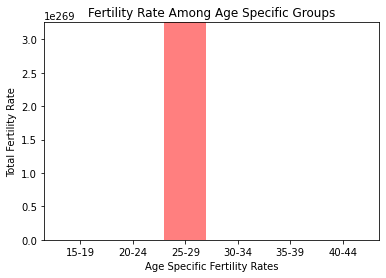

In [24]:
plt.bar(x_axis, bar_chart_mean, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['15-19','20-24',"25-29","30-34","35-39","40-44"])
plt.ylim(0, max(bar_chart_mean) + 2)
plt.title("Fertility Rate Among Age Specific Groups")
plt.xlabel("Age Specific Fertility Rates")
plt.ylabel("Total Fertility Rate")
plt.show()

<AxesSubplot:>

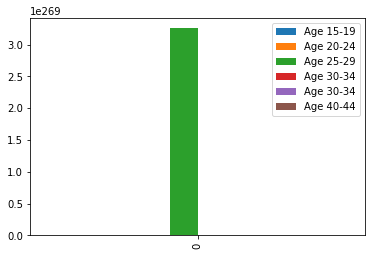

In [25]:
bar_chart_dataframe[['Age 15-19','Age 20-24','Age 25-29','Age 30-34','Age 35-39', 'Age 40-44']].plot(kind='bar')

In [21]:
# Age Specific Mean:

# Define variable that holds the columns that need to have a mean calculated
bar_chart_mean = correlation_df[["Age-specific fertility rates: 15-19", "Age-specific fertility rates: 20-24", 
                                 "Age-specific fertility rates: 25-29", "Age-specific fertility rates: 30-34",
                                "Age-specific fertility rates: 35-39", "Age-specific fertility rates: 40-44"]].mean()
bar_chart_mean

Age-specific fertility rates: 15-19    1.114866e+210
Age-specific fertility rates: 20-24    2.744765e+263
Age-specific fertility rates: 25-29    3.254098e+269
Age-specific fertility rates: 30-34    3.169992e+254
Age-specific fertility rates: 35-39    2.759139e+233
Age-specific fertility rates: 40-44    1.952802e+188
dtype: float64

#### Bar Chart: Mean Fertility Rates amoung Age Specific Groups

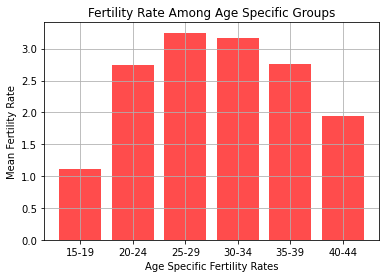

In [36]:
# Bar Chart 3:

# Define base chart properties
# Define variable for the name of the cities "city_names"
age_specific_fertility = ["15-19", "20-24", "25-29", "30-34", "35-39", "40-44"]
# Define variable for plot points that correspond to the city names
age_specific_mean = [1.11, 2.74, 3.25, 3.17, 2.76, 1.95]
# Use numpy libraries built in function arange (np.arange) to build a graph
x_axis_age_specific = np.arange(len(age_specific_mean))
plt.bar(x_axis_age_specific, age_specific_mean, color="r", alpha=0.7, align="center")
plt.grid()
# Define variable that holds tick value placement in a chart on x_axis_np chart
chart_ticks = [value for value in x_axis_age_specific]
# Now, use the function to call the defined variables "chart_ticks" and "city_names"
plt.xticks(chart_ticks, age_specific_fertility)
plt.title("Fertility Rate Among Age Specific Groups")
plt.xlabel("Age Specific Fertility Rates")
plt.ylabel("Mean Fertility Rate")
plt.show()

#### Observation:
This chart shows the total mean fertility rate of each age bracket.  Since we have determined that 2.1 mean fertility and above has correlation with literacy, it is clear that ages 20 through 39 is the area we need to focus on for this analysis; those are the age specific rates that are greater than 2.1.  Any other age specific data from this dataframe should be considered irrelevant since it is below 2.1 and has no correlation to literacy.